In [1]:
import numpy as np
import pandas as pd

from evtdemand import data, feature, suite

In [44]:
default_params = {
    'data_dir': '../data',
    'model_1': 'lightgbm.LGBMRegressor', 
    'model_2': 'lightgbm.LGBMRegressor',
    'model_1_kwargs': {
        'num_leaves': 50,
        'n_estimators': 100,
        'reg_lambda': 0.1
    },
    'model_2_kwargs': {
        'num_leaves': 50,
        'n_estimators': 100,
        'reg_lambda': 0.1
    },
    'data_kwargs': {
        'real_power_sub_dir': 'real_power',
        'weather_sub_dir': 'weather',
        'real_power_time_period': '_pre_september',
        'real_power_site': 'Staplegrove_CB905',
        'weather_sites': ['staplegrove'],#, 'mousehole'],
        'weather_grid_points': None,
        'weather_interpolate_method': 'interpolate',
        'use_target_delta': False
    },
    'y1_col': 'value_max',
    'y2_col': 'value_min',
    'split_kwargs': {
        'n_splits': 5, 
        'shuffle': False
    },
    'cols_subset': None, 
    'features_kwargs': {
        'features': ['temporal', 'dir_speed', 'lagged', 'demand', 'solar', 'roc'],
        'feature_lags': {
            'value': [1, 2, 3, 4, 5, 6, 48, 96, 336],
            'solar_irradiance_staplegrove_1': [1, 2],
            # 'solar_irradiance_staplegrove_2': [1, 2],
            # 'solar_irradiance_staplegrove_3': [1, 2],
            # 'solar_irradiance_staplegrove_4': [1, 2],
            # 'solar_irradiance_staplegrove_5': [1, 2],
            'temperature_staplegrove_1': [1, 2],
            # 'temperature_staplegrove_2': [1, 2],
            # 'temperature_staplegrove_3': [1, 2],
            # 'temperature_staplegrove_4': [1, 2],
            # 'temperature_staplegrove_5': [1, 2]
        },
        'roc_features': {
            'value': 3
        },
        'sites': ['staplegrove'],
        'grid_points': None
    }
}

In [45]:
df_features, df_target = data.construct_baseline_features_target_dfs(default_params['data_dir'], **default_params['data_kwargs'])
df_features, df_target = feature.create_additional_features(df_features, df_target, **default_params['features_kwargs'])
df_features = feature.process_features(df_features, cols_subset=default_params['cols_subset'])

Wall time: 21 s


{'y1_rmse': 9.564830632306506,
 'y2_rmse': 10.61546968401076,
 'combined_rmse': 14.33432205518877,
 'skill_score': 0.46333919980844857}

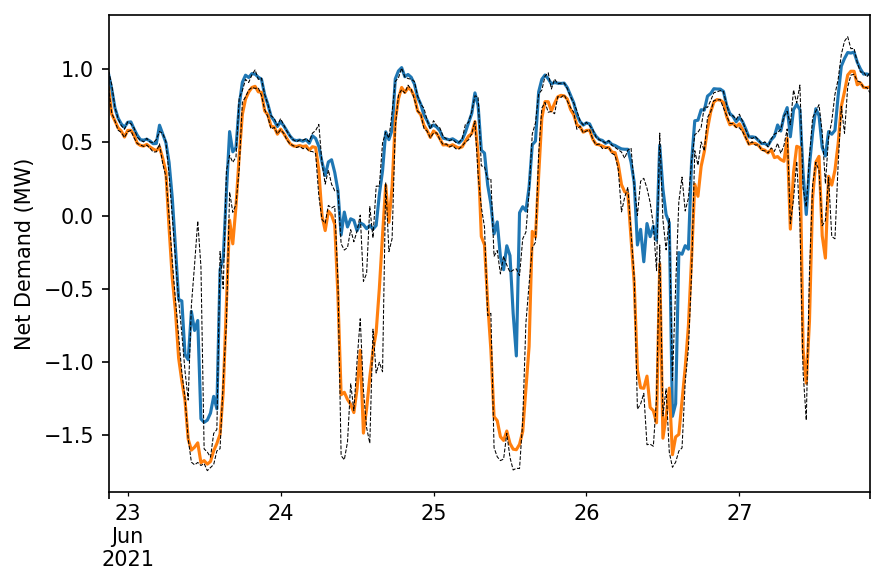

In [46]:
%%time

model_suite, error_metrics, df_pred, input_data = suite.run_parameterised_model(**default_params)
suite.plot_pred_sample(df_pred, df_target)

error_metrics

In [47]:
0.4633391, 0.4331221 # <- only a few lags

(0.4633391, 0.4331221)

In [48]:
suite.calc_month_error_metrics(df_pred, df_target)

{'y1_rmse': 5.2648945808147305,
 'y2_rmse': 6.311222016002555,
 'combined_rmse': 8.218919532540008,
 'skill_score': 0.4331221002514892}

In [25]:
0.46320, 0.436829

(0.4632, 0.436829)